In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the JSONL file
data = []
with open('results/poetry/median_run_elites_500_qdaif.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# Group by genre and tone
grouped = df.groupby(['genre', 'tone']).quality.mean().unstack()

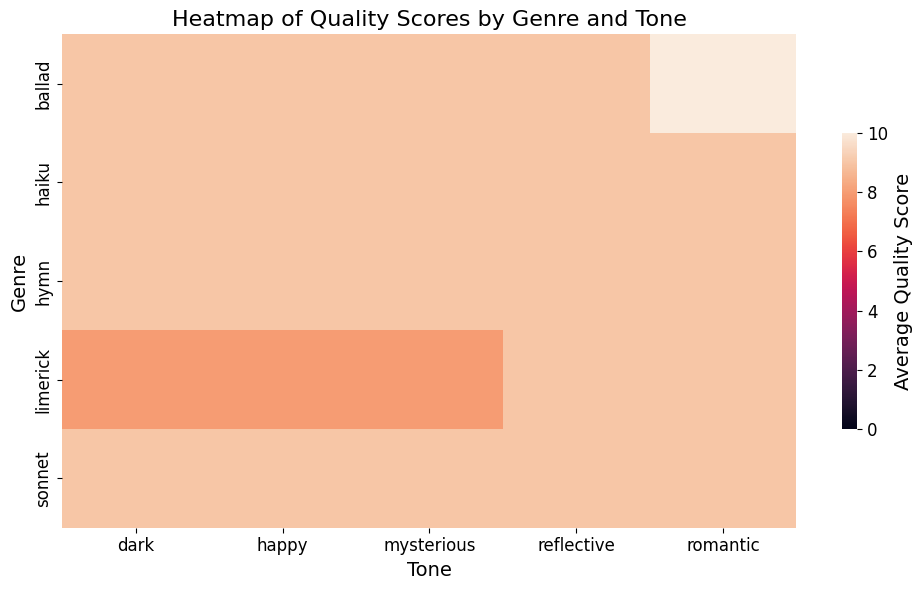

In [3]:
# Plot heatmap
plt.figure(figsize=(10, 6))

ax = sns.heatmap(grouped, annot=False, cmap="rocket", cbar_kws={'label': 'Average Quality Score', 'shrink': 0.6}, vmin=0, vmax=10)

plt.xlabel('Tone', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Heatmap of Quality Scores by Genre and Tone', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Average Quality Score', size=14)

plt.tight_layout()
plt.show()